In [36]:
#Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

In [37]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [38]:
# 3d Tensor(numpy array)
train_images.shape

(60000, 28, 28)

In [39]:
train_images[0].shape

(28, 28)

In [40]:
type(train_images)

numpy.ndarray

In [41]:
train_images.ndim

3

In [42]:
train_labels[0]

5

In [43]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [44]:
test_labels[0]

7

In [45]:
#defining network strucutre

from tensorflow.keras import models
from tensorflow.keras import layers

In [46]:
network = models.Sequential() 

network.add(layers.Dense(512, activation='relu', input_shape=(784,)))

network.add(layers.Dense(10, activation='softmax'))

In [47]:
num_parameter=(512*10)+10
print(num_parameter)
network.summary()

5130
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
train_images = train_images.reshape((60000, 784))    # Vector data (samples, features)
train_images = train_images.astype('float32') / 255  # scaling down the image 

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255

In [50]:
# converting labels 
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [51]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [53]:
network.fit(train_images, train_labels, epochs=5,batch_size=512)

Epoch 1/5
118/118 [==============================] - 4s 31ms/step - loss: 0.0655 - accuracy: 0.9815
Epoch 2/5
118/118 [==============================] - 4s 36ms/step - loss: 0.0547 - accuracy: 0.9845
Epoch 3/5
118/118 [==============================] - 3s 29ms/step - loss: 0.0455 - accuracy: 0.9874
Epoch 4/5
118/118 [==============================] - 3s 29ms/step - loss: 0.0390 - accuracy: 0.9895
Epoch 5/5
118/118 [==============================] - 4s 30ms/step - loss: 0.0332 - accuracy: 0.9912


In [55]:
network.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.0671 - accuracy: 0.9790


[0.06706460565328598, 0.9789999723434448]

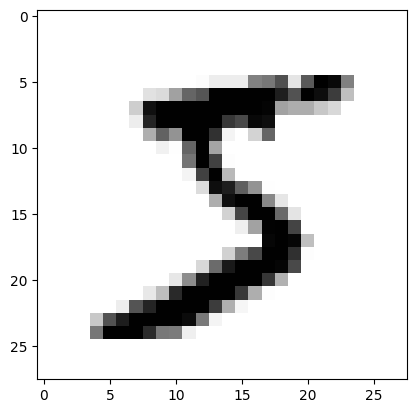

In [57]:
digit = train_images[0].reshape(28,28)*255
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [72]:
from tensorflow.keras.preprocessing import image

In [74]:
img = image.load_img("image6.png",target_size=(28,28), grayscale=True,color_mode='grayscale')

In [76]:
img_arr=image.img_to_array(img)

In [79]:
img_arr=img_arr.reshape(784)

In [81]:
img_arr.shape

(784,)

In [84]:
probs = network.predict(img_arr.reshape(1,784))
probs

1/1 [==============================] - 0s 53ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [86]:
probs.argmax()

5

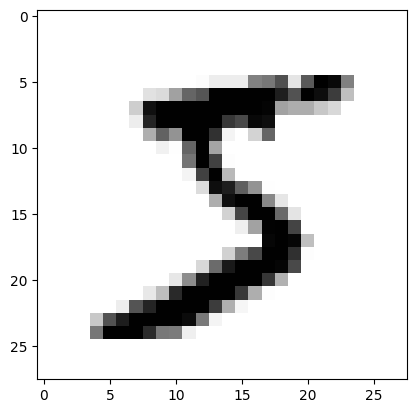

In [93]:
digit = train_images[0].reshape(28,28)*255
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [97]:
from PIL import Image
img = Image.open('image6.png').convert('L')
img.save('pil-greyscale.png')

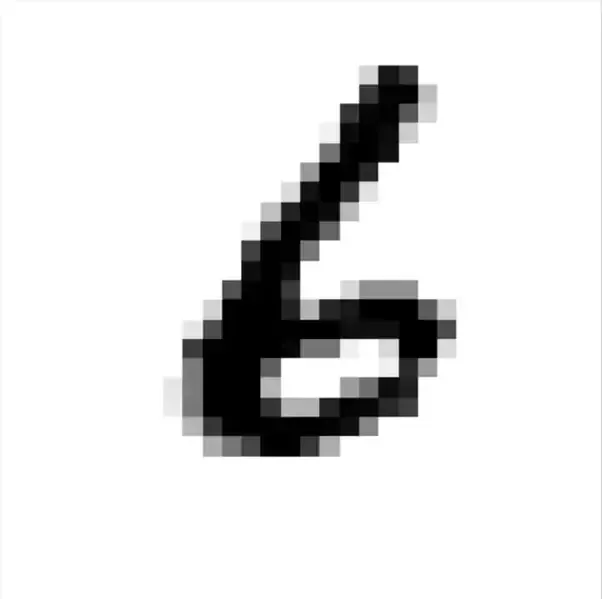

In [99]:
img

In [102]:
x = image.img_to_array(img)
x

array([[[254.],
        [254.],
        [254.],
        ...,
        [246.],
        [238.],
        [224.]],

       [[254.],
        [254.],
        [254.],
        ...,
        [248.],
        [238.],
        [224.]],

       [[254.],
        [254.],
        [254.],
        ...,
        [253.],
        [238.],
        [225.]],

       ...,

       [[247.],
        [249.],
        [253.],
        ...,
        [255.],
        [251.],
        [211.]],

       [[247.],
        [249.],
        [253.],
        ...,
        [255.],
        [251.],
        [211.]],

       [[247.],
        [249.],
        [253.],
        ...,
        [255.],
        [251.],
        [211.]]], dtype=float32)

In [104]:
x.shape

(599, 602, 1)

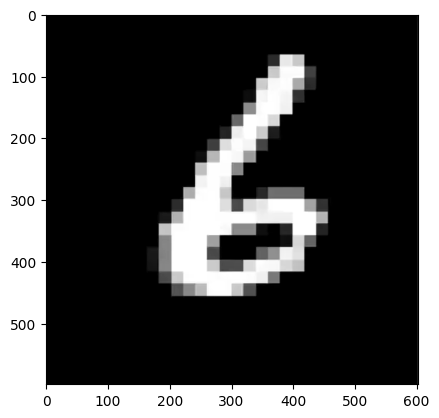

In [106]:
plt.imshow(x, cmap=plt.cm.binary)
plt.show()

In [108]:
x.shape

(599, 602, 1)

In [109]:
# network.save("handwrittendigitclassifier.sav")

INFO:tensorflow:Assets written to: handwrittendigitclassifier.sav\assets


INFO:tensorflow:Assets written to: handwrittendigitclassifier.sav\assets


In [114]:
# from tensorflow.keras.models import models
from tensorflow import keras
model = keras.models.load_model("handwrittendigitclassifier.sav")

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.predict(img_arr.reshape(1,784))

1/1 [==============================] - 0s 92ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)